In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
%  matplotlib inline

In [2]:
#adult = pd.read_csv('adult.csv')

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

train = pd.read_csv('adult_data.txt', sep=",", header=None, names = column_names)
test = pd.read_csv('adult_test.txt', sep=",", header=None, names = column_names)
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


adult = pd.concat([test,train])
adult.reset_index(inplace = True)

In [3]:
# Setting all the categorical columns to type category
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
print(adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
index              48842 non-null int64
age                48842 non-null int64
workclass          48842 non-null category
fnlwgt             48842 non-null int64
education          48842 non-null category
educational-num    48842 non-null int64
marital-status     48842 non-null category
occupation         48842 non-null category
relationship       48842 non-null category
race               48842 non-null category
gender             48842 non-null category
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null category
income             48842 non-null category
dtypes: category(9), int64(7)
memory usage: 3.0 MB
None


In [4]:
# Top 5 records
adult.head()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Feature avaiable
for i in adult.columns:
    print(i)

index
age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


In [6]:
# Summary Statistics
adult.describe()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,13566.611113,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,8999.435232,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,6105.000000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,12210.000000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,20349.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

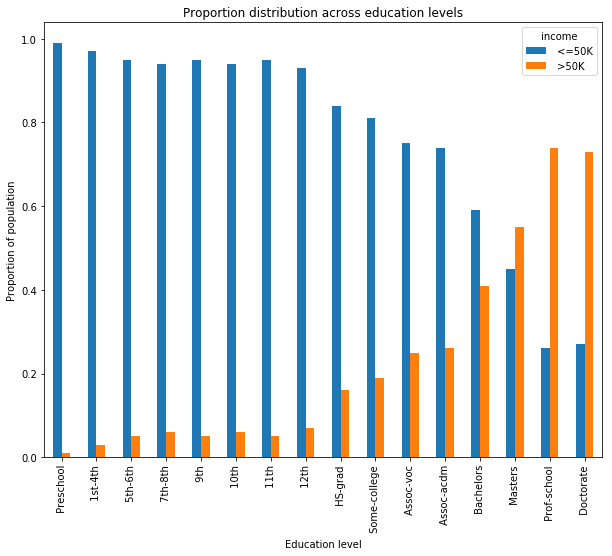

In [8]:
education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

print()

# Decision Tree

In [9]:
adult_data = adult.drop(columns = ['income'])
adult_label = adult.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')

train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)

In [10]:
from sklearn import tree
from sklearn.metrics import accuracy_score



clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)
accuracy_score(test_label,clf_pred)

0.8154942265170748

In [ ]:
# from sklearn.tree import export_graphviz
# from IPython.display import SVG
# from graphviz import Source



# graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=train_data.columns))

# # Display Tree
# SVG(graph.pipe(format='svg'))

# # Save Tree as PNG
# png_bytes = graph.pipe(format='png')
# with open('dtree_pipe.png','wb') as f:
#     f.write(png_bytes)

